In [63]:
import pandas as pd
student_df = pd.read_csv('data_studentlist.csv')

In [64]:
student_df.head()

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


In [65]:
student_df.groupby("absence").agg({"name": "count", "age": "mean"})

,name,age
absence,,
N,13,22.230769
Y,4,22.750000


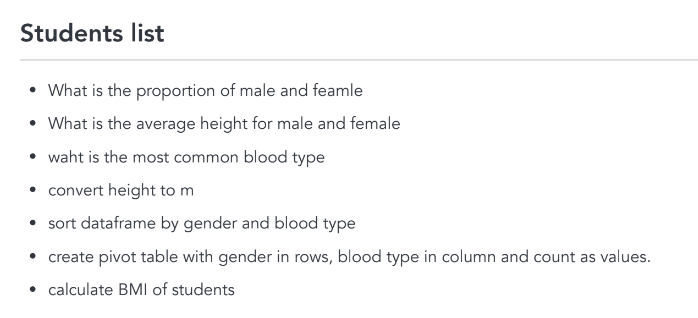

In [66]:
student_df.shape

(17, 8)

In [67]:
# the portion of male and female students
student_df.groupby('gender').agg({'name': 'count'})

,name
gender,
F,7
M,10


In [68]:
def cm_to_m(cm):
    return cm / 100

In [69]:
student_df['height'] = student_df['height'].apply(cm_to_m)
student_df.head()

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,1.653,68.2
1,Sarah O'Donnel,F,22,2,N,AB,1.701,53.0
2,Brian Martin,M,24,4,N,B,1.750,80.1
3,David Hassel,M,23,3,N,AB,1.821,85.7
4,Clara Rodriquez,F,20,1,Y,A,1.680,49.5


In [70]:
# The average height for male and female in meters
print(student_df.groupby('gender')['height'].mean())

gender
F    1.666429
M    1.724100
Name: height, dtype: float64


In [71]:
# the common blood type
student_df.groupby('bloodtype')['bloodtype'].count()

bloodtype
A     4
AB    3
B     5
O     5
Name: bloodtype, dtype: int64

In [72]:
sorted_df = student_df.sort_values(by=['gender', 'bloodtype'])

In [73]:
sorted_df

,name,gender,age,grade,absence,bloodtype,height,weight
4,Clara Rodriquez,F,20,1,Y,A,1.680,49.5
7,Margareth Jones,F,23,1,N,A,1.769,55.0
1,Sarah O'Donnel,F,22,2,N,AB,1.701,53.0
14,Linda Carter,F,22,2,N,B,1.582,45.2
5,Jennifer Lorentz,F,21,2,N,O,1.620,52.0
6,Susan Clark,F,22,1,N,O,1.552,45.3
13,Rebecah Anderson,F,23,3,N,O,1.761,53.1
12,Eddy Johnson,M,21,1,N,A,1.622,55.3
16,Andrew King,M,21,1,N,A,1.692,62.2
3,David Hassel,M,23,3,N,AB,1.821,85.7


In [74]:
sorted_df.pivot_table(values='name', index='gender', columns='bloodtype', aggfunc='count')

bloodtype,A,AB,B,O
gender,,,,
F,2,1,1,3
M,2,2,4,2


In [75]:
def bmi(weight, height):
    return weight / height ** 2

In [76]:
bmi = student_df.apply(lambda row: bmi(row['weight'], row['height']), axis=1)

In [77]:
print(bmi)

0     24.959660
1     18.317544
2     26.155102
3     25.844071
4     17.538265
5     19.814053
6     18.806794
7     17.575473
8     20.149236
9     19.767046
10    22.204387
11    23.395062
12    21.019551
13    17.122840
14    18.060321
15    24.695736
16    21.726495
dtype: float64


In [78]:
# add a column to the dataframe
student_df['bmi'] = bmi
student_df.head()

,name,gender,age,grade,absence,bloodtype,height,weight,bmi
0,Jared Diamond,M,23,3,Y,O,1.653,68.2,24.959660
1,Sarah O'Donnel,F,22,2,N,AB,1.701,53.0,18.317544
2,Brian Martin,M,24,4,N,B,1.750,80.1,26.155102
3,David Hassel,M,23,3,N,AB,1.821,85.7,25.844071
4,Clara Rodriquez,F,20,1,Y,A,1.680,49.5,17.538265


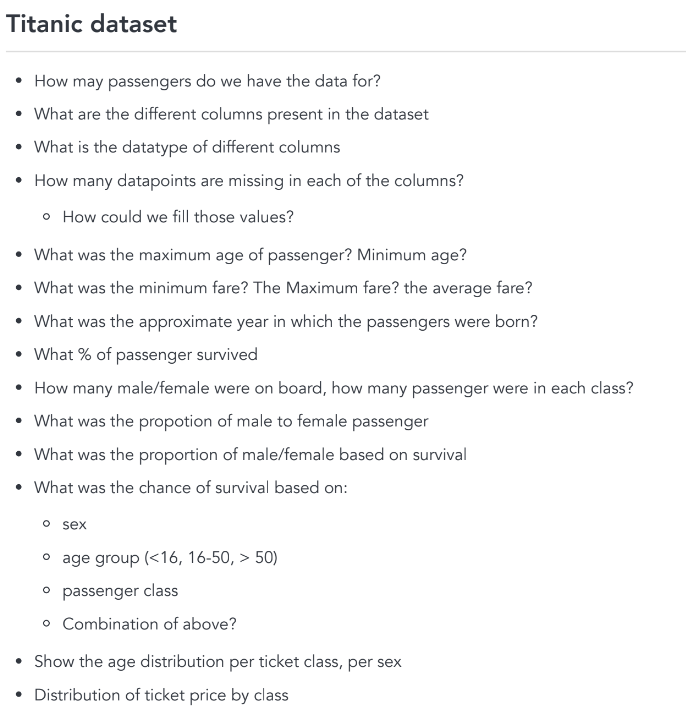

In [79]:
titanic_df = pd.read_csv('data_titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


How many passengers do we have the data for?

In [80]:
titanic_df.shape
print("THERE ARE {} PASSENGERS IN THE TITANIC DATASET".format(titanic_df.shape[0]))

THERE ARE 891 PASSENGERS IN THE TITANIC DATASET


What are the different columns present in the Dataset?

In [81]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

What are the datatypes of different columns


In [82]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


How many datapoints are missing in each of the columns?  

In [83]:
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


How could we fill those values?

In [84]:
def null_percent(column):
    return column.isnull().sum() / len(column) * 100

for column in titanic_df.columns:
    null_per = round(null_percent(titanic_df[column]))

    if null_per > 30:
        print("DROPPING COLUMN {} WITH {}% MISSING VALUES".format(column, null_per))
        titanic_df.drop(column, axis=1, inplace=True)

DROPPING COLUMN Cabin WITH 77% MISSING VALUES


In [85]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

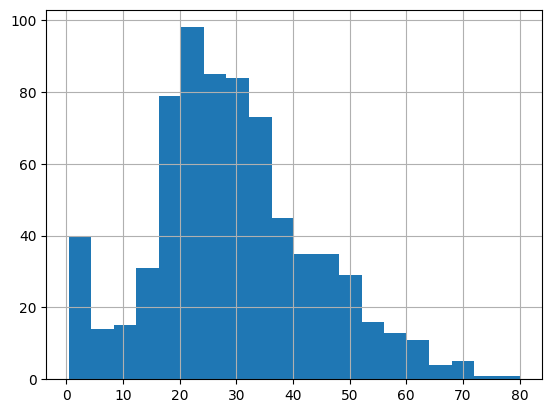

In [86]:
import matplotlib.pyplot as plt

titanic_df['Age'].hist(bins=20)
plt.show()

In [87]:
average_age = round(titanic_df['Age'].mean())
print("THE AVERAGE AGE OF THE PASSENGERS IS {}".format(average_age))

THE AVERAGE AGE OF THE PASSENGERS IS 30


/tmp/ipykernel_50279/2642944429.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(average_age, inplace=True)


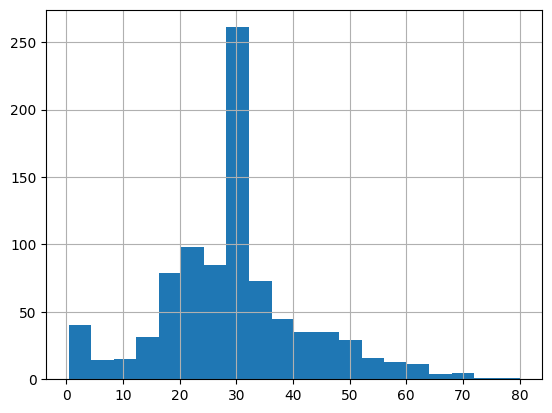

In [88]:
titanic_df['Age'].fillna(average_age, inplace=True)
titanic_df['Age'].hist(bins=20)
plt.show()

In [89]:
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [90]:
titanic_df['Embarked'].fillna('S', inplace=True)
titanic_df['Embarked'].value_counts()

/tmp/ipykernel_50279/2714738895.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna('S', inplace=True)


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [91]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

What was the maximum age of passenger? Minimum age?

In [92]:
print("The maximum age of the passengers is {} and the minimum age is {}".format(titanic_df['Age'].max(), titanic_df['Age'].min()))

The maximum age of the passengers is 80.0 and the minimum age is 0.42


In [93]:
# get the ages that are less than 1
titanic_df[titanic_df['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


In [94]:
titanic_df['Age'] = titanic_df['Age'].apply(lambda age: age if age > 1 else 1)
titanic_df[titanic_df['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


What was the minimum fare? The Maximum fare? the average fare?

In [95]:
print("The maximum fare is {} and the minimum is {}".format(titanic_df['Fare'].max(), titanic_df['Fare'].min()))

The maximum fare is 512.3292 and the minimum is 0.0


What was the approximate year in which the passengers were born?

In [96]:
year_born = []

for age in titanic_df['Age']:
    year_born.append(2024 - age)

temp_df = pd.DataFrame({'Year Born' : year_born, 'Passenger Name' : titanic_df['Name'].tolist()})
temp_df.head()

,Year Born,Passenger Name
0,2002.0,"Braund, Mr. Owen Harris"
1,1986.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1998.0,"Heikkinen, Miss. Laina"
3,1989.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,1989.0,"Allen, Mr. William Henry"


What % of passenger survived

In [97]:
survival_percentage = titanic_df['Survived'].value_counts(normalize=True) * 100
print(survival_percentage)

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


How many male/female were on board, how many passenger were in each class?

In [98]:
titanic_df['Sex'].value_counts(), titanic_df['Pclass'].value_counts()

(Sex
 male      577
 female    314
 Name: count, dtype: int64,
 Pclass
 3    491
 1    216
 2    184
 Name: count, dtype: int64)

What was the propotion of male to female passenger

In [99]:
gender_counts = titanic_df['Sex'].value_counts()

proportion = gender_counts['male'] / gender_counts['female']
print("male count = {}, female count = {}, male to female proportion = {}".format(gender_counts['male'], gender_counts['female'], proportion))

male count = 577, female count = 314, male to female proportion = 1.8375796178343948


What was the proportion of male/female based on survival

In [100]:
survival_gender_matrix = titanic_df.pivot_table(index='Survived', columns='Sex', values='Name', aggfunc='count')
survival_gender_matrix

Sex,female,male
Survived,,
0,81,468
1,233,109


In [101]:
proportion_survived = survival_gender_matrix.loc[1, 'male'] / survival_gender_matrix.loc[1, 'female']
proportion_not_survived = survival_gender_matrix.loc[0, 'male'] / survival_gender_matrix.loc[0, 'female']

proportion_survived, proportion_not_survived

(0.4678111587982833, 5.777777777777778)

Chances of survival based on gender

In [102]:
survival_rate_gender = titanic_df.groupby('Sex')['Survived'].mean()
survival_rate_gender

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Chances of survival based on age group (<16, 16-50, > 50)

In [103]:
# Let the age group <16 be 'Child', 16-50 be 'Adult' and >50 be 'Senior'

bins = [1, 15, 50, float('inf')]
labels = ['Child', 'Adult', 'Senior']
titanic_df['Age Group'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


In [104]:
survival_rate_age_group = titanic_df.groupby('Age Group')['Survived'].mean()
survival_rate_age_group

/tmp/ipykernel_50279/1788524747.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_age_group = titanic_df.groupby('Age Group')['Survived'].mean()


Age Group
Child     0.536232
Adult     0.364247
Senior    0.343750
Name: Survived, dtype: float64

Chances of survival based on passenger class

In [105]:
survival_rate_pclass = titanic_df.groupby('Pclass')['Survived'].mean()
survival_rate_pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [106]:
survival_rate = titanic_df.groupby(['Age Group', 'Pclass', 'Sex'])['Survived'].mean()
survival_rate

/tmp/ipykernel_50279/2845009805.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = titanic_df.groupby(['Age Group', 'Pclass', 'Sex'])['Survived'].mean()


Age Group  Pclass  Sex   
Child      1       female    0.666667
                   male      1.000000
           2       female    1.000000
                   male      1.000000
           3       female    0.461538
                   male      0.291667
Adult      1       female    0.974359
                   male      0.397849
           2       female    0.920635
                   male      0.080460
           3       female    0.486726
                   male      0.122581
Senior     1       female    1.000000
                   male      0.192308
           2       female    0.666667
                   male      0.083333
           3       female    1.000000
                   male      0.000000
Name: Survived, dtype: float64

Show the age distribution per ticket class, per sex

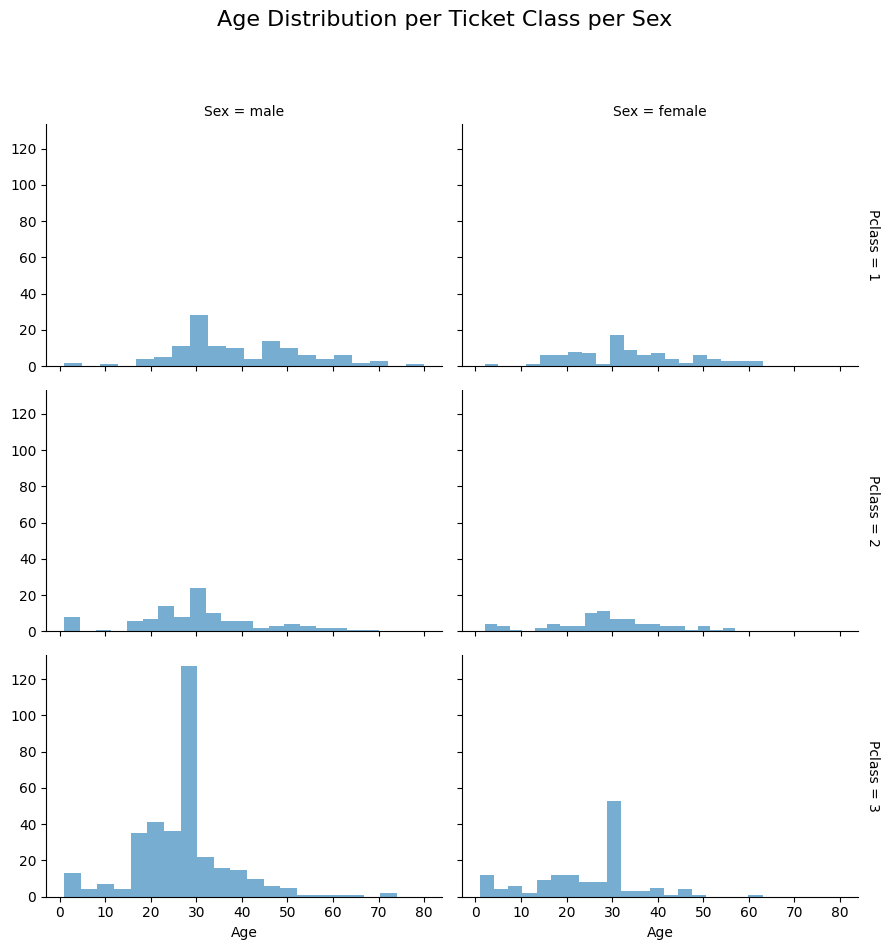

In [107]:
import seaborn as sns

g = sns.FacetGrid(titanic_df, row='Pclass', col='Sex', margin_titles=True, height=3, aspect=1.5)
g.map(plt.hist, 'Age', bins=20, alpha=0.6)

g.fig.suptitle('Age Distribution per Ticket Class per Sex', fontsize=16, y=1.05)
g.fig.tight_layout()

plt.show()

Distribution of ticket price by class

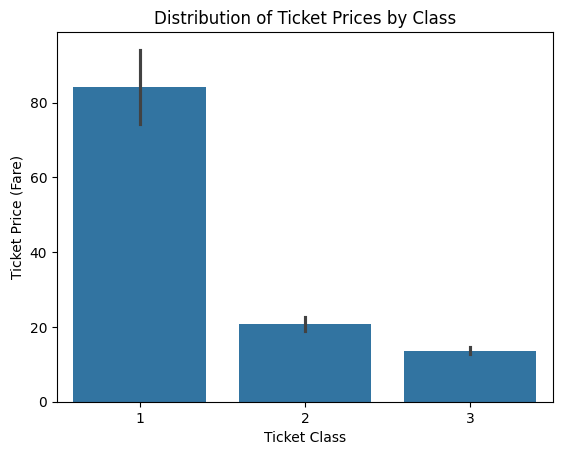

In [108]:
sns.barplot(x='Pclass', y='Fare', data=titanic_df)
plt.title('Distribution of Ticket Prices by Class')
plt.xlabel('Ticket Class')
plt.ylabel('Ticket Price (Fare)')
plt.show()

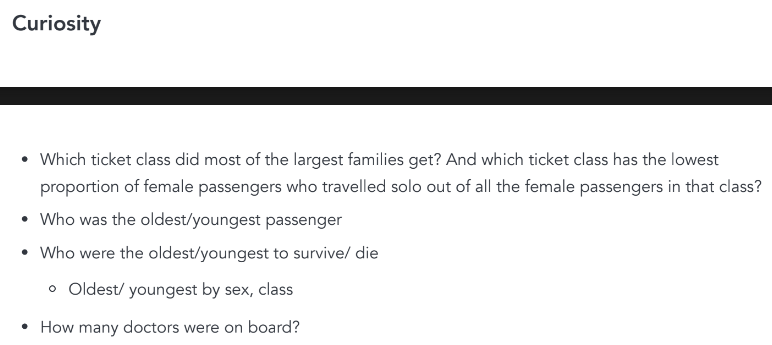

Who was the oldest/youngest passenger

In [125]:
oldest_survived = titanic_df[titanic_df['Survived'] == 1]['Age'].idxmax()
youngest_survived = titanic_df[titanic_df['Survived'] == 1]['Age'].idxmin()

print("The oldest person who survived was {} years old and the youngest was {} years old".format(titanic_df.loc[oldest_survived, 'Age'], titanic_df.loc[youngest_survived, 'Age']))

The oldest person who survived was 80.0 years old and the youngest was 1.0 years old


Who were the oldest/youngest to survive/ die
Oldest/ youngest by sex, class

In [114]:
oldest_not_survived = titanic_df[titanic_df['Survived'] == 0]['Age'].idxmax()
youngest_not_survived = titanic_df[titanic_df['Survived'] == 0]['Age'].idxmin()

print("The oldest person who did not survive was {} years old and the youngest was {} years old".format(titanic_df.loc[oldest_not_survived, 'Age'], titanic_df.loc[youngest_not_survived, 'Age']))

The oldest person who did not survive was 74.0 years old and the youngest was 1.0 years old


In [124]:
grouped = titanic_df.groupby(['Pclass', 'Sex'])

oldest_in_group = grouped['Age'].idxmax()
youngest_in_group = grouped['Age'].idxmin()

print("The oldest person in each group is: \n{} \n and the youngest is: \n{}".format(titanic_df.loc[oldest_in_group, ['Sex', 'Pclass', 'Age']], titanic_df.loc[youngest_in_group, ['Sex', 'Pclass', 'Age']]))

The oldest person in each group is: 
        Sex  Pclass   Age
275  female       1  63.0
630    male       1  80.0
772  female       2  57.0
672    male       2  70.0
483  female       3  63.0
851    male       3  74.0 
 and the youngest is: 
        Sex  Pclass  Age
297  female       1  2.0
305    male       1  1.0
530  female       2  2.0
78     male       2  1.0
172  female       3  1.0
164    male       3  1.0


How many doctors were on board?

In [111]:
num_doc  = titanic_df['Name'].str.contains(r'Dr\.').sum()
print("THERE ARE {} DOCTORS IN THE PASSENGER LIST".format(num_doc))

THERE ARE 7 DOCTORS IN THE PASSENGER LIST


In [112]:
doc_info = titanic_df[titanic_df['Name'].str.contains(r'Dr\.')]
doc_info

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,Q,Adult
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,S,Senior
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,S,Adult
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,C,Adult
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S,Adult
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,30.0,0,0,112379,39.6000,C,Adult
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S,Adult


Which ticket class did most of the largest families get? 

In [126]:
titanic_df['Family Size'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1 # 1 is for the passenger themselves
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,1


In [135]:
# Let the family with size > 4 be 'Large'

large_family_df = titanic_df[titanic_df['Family Size'] > 4]

# Most common class in large families
most_common_class = large_family_df['Pclass'].mode()[0]
print("THE MOST COMMON CLASS IN LARGE FAMILIES IS {}".format(most_common_class))

THE MOST COMMON CLASS IN LARGE FAMILIES IS 3


Which ticket class has the lowest proportion of female passengers who travelled solo out of all the female passengers in that class?

In [156]:
female_df = titanic_df[titanic_df['Sex'] == 'female']

proportions = {}

for pclass in {1, 2, 3}:
    class_female = female_df[female_df['Pclass'] == pclass]

    solo_female_proportion = class_female[(class_female['SibSp'] == 0) & (class_female['Parch'] == 0)].shape[0] / class_female.shape[0]

    proportions[pclass] = solo_female_proportion


print( " The class that has the lowest proportion of female passengers who travelled solo out of all the female passengers in that class is Class ", min(proportions, key=proportions.get))

 The class that has the lowest proportion of female passengers who travelled solo out of all the female passengers in that class is Class  1
